# <center> MNIST </center>
## <center> INF283 - Project 2 </center>
### <center> Sindre E. de Lange </center>

In [1]:
import sys
sys.path.append("../utils")
from Data import *
from Models import *
from Plots import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.patches as npatches
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [2]:
data_util = Data()
model_util = Models()
plots_util = Plots()

In [3]:
classifiers_dict = {}

In [4]:
model_name_save = "MNIST_"
pickle_model_ext = ".pickle.dat"
models_path = "../models/"
dictionary_path = "../dictionaries/"

In [5]:
random_state = 42

## NN

In [6]:
model_name_nn = "NN"

In [7]:
full_name_nn = model_name_save + model_name_nn

### Save time by loading the model

In [8]:
# model_nn = model_util.load_model(full_name_nn)
# model_nn.summary()

### Or train it yourself

In [9]:
X_train_nn, X_val_nn, X_test_nn, y_train_nn, y_val_nn, y_test_nn = data_util.get_data(train_val_test=True)

In [10]:
data_util.print_data_shapes_val(X_train=X_train_nn, 
                                X_test=X_test_nn, 
                                y_train=y_train_nn, 
                                y_test=y_test_nn, 
                                y_val = y_val_nn, 
                                X_val = X_val_nn)

X_train:  (39199, 784)
X_val:  (16800, 784)
X_test:  (14000, 784)
y_train:  (39199, 10)
y_val:  (16800, 10)
y_test:  (14000, 10)


In [11]:
model_nn = model_util.get_nn_model()

In [12]:
model_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 60)                7740      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                610       
Total params: 242,206
Trainable params: 242,206
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs_nn = 10
bs_nn = 64

In [14]:
time_nn, history_nn = model_util.train_nn_model(model_nn,
                                                X_train_nn,
                                                X_val_nn,
                                                X_test_nn,
                                                y_train_nn,
                                                y_val_nn,
                                                y_test_nn,
                                                epochs_nn, bs_nn)

Train on 39199 samples, validate on 16800 samples
Epoch 1/10
39199/39199 [==============================] - 7s 175us/step - loss: 1.5277 - acc: 0.8827 - val_loss: 0.7903 - val_acc: 0.9092
Epoch 2/10
39199/39199 [==============================] - 6s 161us/step - loss: 0.7042 - acc: 0.9141 - val_loss: 0.6715 - val_acc: 0.9098
Epoch 3/10
39199/39199 [==============================] - 6s 162us/step - loss: 0.6242 - acc: 0.9208 - val_loss: 0.6235 - val_acc: 0.9170
Epoch 4/10
39199/39199 [==============================] - 6s 165us/step - loss: 0.5770 - acc: 0.9288 - val_loss: 0.5629 - val_acc: 0.9258
Epoch 5/10
39199/39199 [==============================] - 7s 173us/step - loss: 0.5410 - acc: 0.9340 - val_loss: 0.5175 - val_acc: 0.9353
Epoch 6/10
39199/39199 [==============================] - 7s 177us/step - loss: 0.5106 - acc: 0.9368 - val_loss: 0.5113 - val_acc: 0.9357
Epoch 7/10
39199/39199 [==============================] - 7s 171us/step - loss: 0.4877 - acc: 0.9392 - val_loss: 0.4934 - 

In [15]:
print(history_nn.history['val_acc'][-1])
print(history_nn.history['acc'][-1])

0.9527976190476191
0.9474221280927047


In [16]:
val_acc_last_nn = history_nn.history['val_acc'][-1]

In [40]:
classifiers_dict[model_name_nn] = {'accuracy': val_acc_last_nn, 'time': time_nn}

In [11]:
# Save the model
# model_util.save_model(model_nn, model_name_save + model_name_nn)

Saving model:  foo  to the folder:  ../models/


## CNN

In [18]:
model_name_cnn = "CNN"

In [19]:
full_name_cnn = model_name_save + model_name_cnn

### Save time by loading the model

In [20]:
# model_cnn = model_util.load_model(full_name_cnn)
# model_cnn.summary()

In [6]:
X_train_cnn, X_val_cnn, X_test_cnn, y_train_cnn, y_val_cnn, y_test_cnn = data_util.get_data(one_hot_enc=False, 
                                                                                            reshape=True, 
                                                                                            train_val_test=True)

In [7]:
y_train_cnn_cat, y_val_cnn_cat, y_test_cnn_cat = data_util.label_to_categorical(y_train_cnn, 
                                                                                y_val_cnn, 
                                                                                y_test_cnn)

In [8]:
data_util.print_data_shapes_val(X_train=X_train_cnn, 
                                X_test=X_test_cnn, 
                                y_train=y_train_cnn_cat, 
                                y_test=y_test_cnn_cat, 
                                y_val = y_val_cnn_cat, 
                                X_val = X_val_cnn)

X_train:  (39199, 28, 28, 1)
X_val:  (16800, 28, 28, 1)
X_test:  (14000, 28, 28, 1)
y_train:  (39199, 10)
y_val:  (16800, 10)
y_test:  (14000, 10)


In [9]:
model_cnn = model_util.get_cnn_model()

In [25]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
_________________________________________________________________


In [26]:
epochs_cnn = 10
bs_cnn = 64

In [27]:
time_cnn, history_cnn = model_util.train_cnn_model(model_cnn, 
                                                                       X_train_cnn, 
                                                                       X_val_cnn, 
                                                                       X_test_cnn, 
                                                                       y_train_cnn_cat, 
                                                                       y_val_cnn_cat, 
                                                                       y_test_cnn_cat, 
                                                                       epochs_cnn, 
                                                                       bs_cnn)

Train on 39199 samples, validate on 16800 samples
Epoch 1/10
39199/39199 [==============================] - 30s 757us/step - loss: 0.2444 - acc: 0.9277 - val_loss: 0.0965 - val_acc: 0.9717
Epoch 2/10
39199/39199 [==============================] - 28s 707us/step - loss: 0.0895 - acc: 0.9721 - val_loss: 0.0759 - val_acc: 0.9765
Epoch 3/10
39199/39199 [==============================] - 29s 752us/step - loss: 0.0648 - acc: 0.9797 - val_loss: 0.0537 - val_acc: 0.9834
Epoch 4/10
39199/39199 [==============================] - 29s 750us/step - loss: 0.0502 - acc: 0.9838 - val_loss: 0.0487 - val_acc: 0.9856
Epoch 5/10
39199/39199 [==============================] - 30s 773us/step - loss: 0.0436 - acc: 0.9851 - val_loss: 0.0514 - val_acc: 0.9843
Epoch 6/10
39199/39199 [==============================] - 26s 654us/step - loss: 0.0354 - acc: 0.9883 - val_loss: 0.0424 - val_acc: 0.9881
Epoch 7/10
39199/39199 [==============================] - 25s 635us/step - loss: 0.0317 - acc: 0.9895 - val_loss: 0.

In [28]:
print(history_cnn.history['val_acc'][-1])
print(history_cnn.history['acc'][-1])

0.9871428571428571
0.9930100257659634


In [42]:
val_acc_last_cnn = history_cnn.history['val_acc'][-1]

In [43]:
classifiers_dict[model_name_cnn] = {'accuracy': val_acc_last_cnn, 'time': time_cnn}

In [36]:
# Save the model
# model_util.save_model(model, model_name_save + model_name_cnn)

## Random Forest

In [37]:
model_name_rf = "RF"

In [38]:
full_path_rf = models_path + model_name_save + model_name_rf + pickle_model_ext

### Save time by loading the model

In [39]:
# random_f_clf = pickle.load(open(full_path_rf, "rb"))

### Or train it yourself

In [40]:
X_train_rf, X_val_rf, X_test_rf, y_train_rf, y_val_rf, y_test_rf = data_util.get_data(train_val_test=True)

In [41]:
data_util.print_data_shapes_val(X_train=X_train_rf, 
                                X_test=X_test_rf, 
                                y_train=y_train_rf, 
                                y_test=y_test_rf, 
                                y_val = y_val_rf, 
                                X_val = X_val_rf)

X_train:  (39199, 784)
X_val:  (16800, 784)
X_test:  (14000, 784)
y_train:  (39199, 10)
y_val:  (16800, 10)
y_test:  (14000, 10)


In [42]:
random_f_clf = RandomForestClassifier(n_estimators=50,
                                     n_jobs = 2,
                                     random_state=random_state)
start_rf = time.time()
random_f_clf.fit(X_train_rf, y_train_rf)
end_rf = time.time()
tot_rf = round(end_rf - start_rf, 3)

In [43]:
y_pred_rf = random_f_clf.predict(X_val_rf)
scores_rf = round(accuracy_score(y_val_rf, y_pred_rf), 3)
print("Scores: ", scores_rf, "\n Training time: ", tot_rf, " seconds")

Scores:  0.88 
 Training time:  12.476  seconds


In [44]:
classifiers_dict[model_name_rf] = {'accuracy': scores_rf, 'time': tot_rf}

In [45]:
# Save the model
# pickle.dump(random_f_clf, open(full_path_rf, "wb"))

## XGBoost

In [46]:
model_name_xgb = "XGB"

In [47]:
full_path_xgb = models_path + model_name_save + model_name_xgb + pickle_model_ext

### Save time by loading the model

In [48]:
optim_est_xgb = pickle.load(open(full_path_xgb, "rb"))

### Or train it yourself (Disclaimer: This one is time consuming)

In [53]:
X_train_xgb, X_val_xgb, X_test_xgb, y_train_xgb, y_val_xgb, y_test_xgb = data_util.get_data(one_hot_enc=False, train_val_test=True)

In [59]:
data_util.print_data_shapes_val(X_train=X_train_xgb, 
                                X_test=X_test_xgb, 
                                y_train=y_train_xgb, 
                                y_test=y_test_xgb, 
                                y_val = y_val_xgb, 
                                X_val = X_val_xgb)

X_train:  (39199, 784)
X_val:  (16800, 784)
X_test:  (14000, 784)
y_train:  (39199, 1)
y_val:  (16800, 1)
y_test:  (14000, 1)


In [60]:
params = {
        'gamma': [0.5, 2],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 5],
        'n_estimators': [5, 10]
        }

In [63]:
%%capture 
xgb_clf = XGBClassifier()
rs = GridSearchCV(xgb_clf,
                  params,
                  cv=2,
                  scoring="accuracy",
                  n_jobs=1,
                  verbose=2)
start_xgb = time.time()
rs.fit(X_train_xgb, y_train_xgb.values.ravel())
end_xgb = time.time()
tot_xgb = round(end_xgb - start_xgb, 2)

In [66]:
optim_est_xgb = rs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)


In [49]:
print(optim_est_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=2, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=nan, n_estimators=10,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)


In [54]:
y_pred_xgb = optim_est_xgb.predict(X_val_xgb)
scores_xgb = accuracy_score(y_val_xgb, y_pred_xgb)

In [56]:
print("Scores: ", scores_xgb, "\n Training time: ", tot_xgb, " seconds")

Scores:  0.9019642857142857 
 Training time:  1913.77  seconds


In [65]:
classifiers_dict['XGB'] = {'accuracy': scores_xgb, 'time': tot_xgb}

In [66]:
# Save the model
# pickle.dump(optim_est_xgb, open(full_path_xgb, "wb"))

> Saving the dictionary to file

In [83]:
classifiers_dict_f_name = "classifiers_dict.npy"
classifiers_dict_f_path = dictionary_path + classifiers_dict_f_name

In [54]:
np.save(classifiers_dict_f_path, classifiers_dict)

# Evaluating

In [38]:
# To load the classifiers dict:
classifiers_dict = np.load(classifiers_dict_f_path).item()

In [44]:
classifiers_dict

{'NN': {'accuracy': 0.9527976190476191, 'time': 66.88},
 'CNN': {'accuracy': 0.9871428571428571, 'time': 279.143},
 'RF': {'accuracy': 0.88, 'time': 12.476},
 'XGB': {'accuracy': 0.9019642857142857, 'time': 1913.77}}

In [72]:
accuracy_list = []
time_list = []
classifiers_list = []
for k, v in classifiers_dict.items():
    classifiers_list.append(k)
    accuracy_list.append(classifiers_dict[k]['accuracy'])
    time_list.append(classifiers_dict[k]['time'])

> I want to plot both time and accuracy in the same plot, for the different classifiers, but accuracy ranges from 0-1, while time ranges from approximately 16 seconds to 2500 seconds. This means I have to normalize the time values, so that they are between 0 and 1.

In [73]:
# normalize time list
normalizing_constant = max(time_list)
for i in range(len(time_list)):
    time_list[i] = time_list[i]/normalizing_constant
    print(time_list[i])

0.00711893278711653
0.026442571468880793
0.006519069689670128
1.0


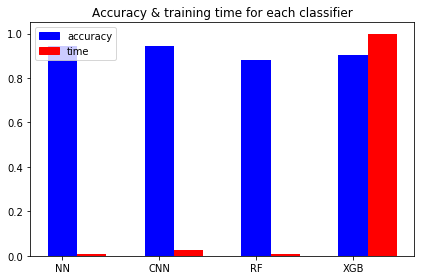

In [77]:
y_pos = np.arange(len(classifiers_list))
bar_width = 0.3
plt.bar(y_pos, accuracy_list, width=bar_width, color='b', align='center')
plt.bar(y_pos + bar_width, time_list, width=bar_width, color='r', align='center')
plt.xticks(y_pos, classifiers_list)
plt.title('Accuracy & training time for each classifier')

blue = npatches.Patch(color='blue', label='accuracy')
red = npatches.Patch(color='red', label='time')

plt.legend(handles=[blue, red])
plt.tight_layout()
plt.show()

> Pretty simple to see that XGBoost is poluting the plot - remove it, and try again, to get a better look at the actually successfull models

In [78]:
classifiers_list_no_xgb = classifiers_list
xgb_index = classifiers_list_no_xgb.index('XGB')
accuracy_list.pop(xgb_index)
time_list.pop(xgb_index)
classifiers_list_no_xgb.pop(xgb_index)

'XGB'

> Still have to normalize time values 

In [79]:
normalizing_constant = max(time_list)
for i in range(len(time_list)):
    time_list[i] = time_list[i]/normalizing_constant
    print(time_list[i])

0.2692224088528802
1.0
0.2465369034680368


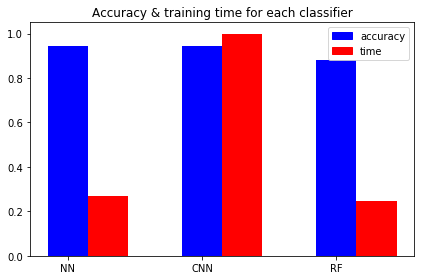

In [80]:
y_pos = np.arange(len(classifiers_list))
bar_width = 0.3
plt.bar(y_pos, accuracy_list, width=bar_width, color='b', align='center')
plt.bar(y_pos + bar_width, time_list, width=bar_width, color='r', align='center')
plt.xticks(y_pos, classifiers_list)
plt.title('Accuracy & training time for each classifier')

blue = npatches.Patch(color='blue', label='accuracy')
red = npatches.Patch(color='red', label='time')

plt.legend(handles=[blue, red])
plt.tight_layout()
plt.show()

Can see that NN and CNN are relatively equal, with CNN edging a small advantage in both metrics, and far superior to Random Forest - accuracy-wise. Random Forest on the other hand is much better time-wise. If the data set would've required computation time equal to many hours, then Random Forest would probably be the most relevant model, at least for a starter model. However, the difference in time is approximately 1 minute, while the accuracy difference is ~ 10%.  

## Plots (Neural Networks)

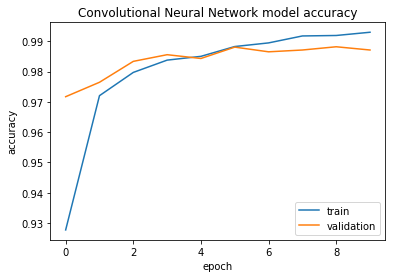

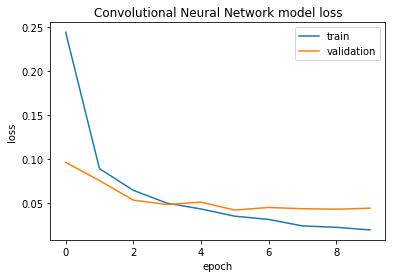

In [33]:
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('Convolutional Neural Network model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Convolutional Neural Network model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

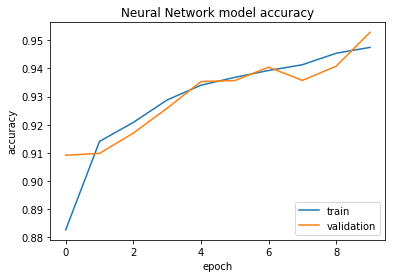

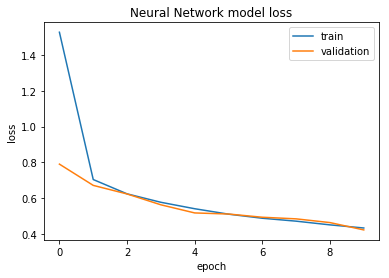

In [35]:
plt.plot(history_nn.history['acc'])
plt.plot(history_nn.history['val_acc'])
plt.title('Neural Network model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.title('Neural Network model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Conclusion

It is pretty clear that neural networks are the way to go, more specifically that convolutional neural networks are superior at recognizing images (confirming every experiment made since cnn's were invented). 

With this in mind it seems only necessary to do hyperparameter tuning for the aformentioned cnn, and remember to increase the dropout, because of the previous overfitting 

In [18]:
batch_size = [50, 100]
epochs = [6, 12]
learning_rate = [1e-3, 1e-4]
pool_size = [(3, 3)]
activation = ['relu']
dropout = [7e-1, 5e-1]
classifier_cnn = {}

> **NOTE** <br>
Do not find it necessary to test other optimizers other than Adam, seeing as this combines the best of two worlds: Momentum with RMSprop

In [19]:
start_cnn_optim = time.time()
counter = 0
for bs in batch_size:
    for epoch in epochs:
        for lr in learning_rate:
            for pool_s in pool_size:
                for activat in activation:
                    for drop in dropout:
                        start_cnn_optim_each_model = time.time()
                        model_cnn_optim = model_util.get_cnn_model(activation=activat,
                                                                   pool_size=pool_s,
                                                                   dropout=drop,
                                                                  learning_rate=lr)
                        history_cnn_optim = model_cnn_optim.fit(X_train_cnn,
                                            y_train_cnn_cat,
                                            validation_data=(X_val_cnn, y_val_cnn_cat),
                                            epochs=epoch,
                                            batch_size=bs)
                        
                        end_cnn_optim_each_model = time.time()
                        total_cnn_optim_each_model = end_cnn_optim_each_model - start_cnn_optim_each_model
                        
                        classifier_cnn[counter] = {'parameters':
                                               {
                                                   'batch_size': bs,
                                                   'epochs': epoch,
                                                   'learning-rate': lr,
                                                   'pool-size': pool_s,
                                                   'activation': activat,
                                                   'dropout': drop
                                               },
                                                   'time': total_cnn_optim_each_model,
                                                   'history': history_cnn_optim,
                                                   'model': model_cnn_optim
                                              }
                        print(classifier_cnn[counter])
                        counter += 1
                    
                    
end_cnn_optim = time.time()
total_cnn_optim = end_cnn_optim - start_cnn_optim

Train on 39199 samples, validate on 16800 samples
Epoch 1/6
39199/39199 [==============================] - 19s 494us/step - loss: 0.3381 - acc: 0.8955 - val_loss: 0.1055 - val_acc: 0.9687
Epoch 2/6
39199/39199 [==============================] - 22s 550us/step - loss: 0.1457 - acc: 0.9546 - val_loss: 0.0764 - val_acc: 0.9760
Epoch 3/6
39199/39199 [==============================] - 22s 559us/step - loss: 0.1113 - acc: 0.9644 - val_loss: 0.0606 - val_acc: 0.9815
Epoch 4/6
39199/39199 [==============================] - 20s 517us/step - loss: 0.0946 - acc: 0.9689 - val_loss: 0.0524 - val_acc: 0.9845
Epoch 5/6
39199/39199 [==============================] - 20s 506us/step - loss: 0.0804 - acc: 0.9744 - val_loss: 0.0453 - val_acc: 0.9868
Epoch 6/6
39199/39199 [==============================] - 20s 508us/step - loss: 0.0762 - acc: 0.9758 - val_loss: 0.0447 - val_acc: 0.9865
{'parameters': {'batch_size': 50, 'epochs': 6, 'learning-rate': 0.001, 'pool-size': (3, 3), 'activation': 'relu', 'dropout

39199/39199 [==============================] - 26s 657us/step - loss: 0.0254 - acc: 0.9908 - val_loss: 0.0375 - val_acc: 0.9899
Epoch 12/12
39199/39199 [==============================] - 25s 650us/step - loss: 0.0225 - acc: 0.9923 - val_loss: 0.0386 - val_acc: 0.9897
{'parameters': {'batch_size': 50, 'epochs': 12, 'learning-rate': 0.001, 'pool-size': (3, 3), 'activation': 'relu', 'dropout': 0.5}, 'time': 320.5300874710083, 'history': <keras.callbacks.History object at 0x000001A9EFEB7E10>, 'model': <keras.engine.sequential.Sequential object at 0x000001A9EFAC5D68>}
Train on 39199 samples, validate on 16800 samples
Epoch 1/12
39199/39199 [==============================] - 28s 723us/step - loss: 0.9369 - acc: 0.7148 - val_loss: 0.3531 - val_acc: 0.9027
Epoch 2/12
39199/39199 [==============================] - 24s 623us/step - loss: 0.3902 - acc: 0.8810 - val_loss: 0.2459 - val_acc: 0.9323
Epoch 3/12
39199/39199 [==============================] - 24s 609us/step - loss: 0.3018 - acc: 0.9083 

39199/39199 [==============================] - 28s 702us/step - loss: 0.9855 - acc: 0.7315 - val_loss: 0.3824 - val_acc: 0.8980
Epoch 2/6
39199/39199 [==============================] - 24s 605us/step - loss: 0.3593 - acc: 0.8957 - val_loss: 0.2586 - val_acc: 0.9302
Epoch 3/6
39199/39199 [==============================] - 22s 559us/step - loss: 0.2748 - acc: 0.9191 - val_loss: 0.2089 - val_acc: 0.9421
Epoch 4/6
39199/39199 [==============================] - 22s 550us/step - loss: 0.2290 - acc: 0.9312 - val_loss: 0.1786 - val_acc: 0.9500
Epoch 5/6
39199/39199 [==============================] - 19s 482us/step - loss: 0.1982 - acc: 0.9412 - val_loss: 0.1516 - val_acc: 0.9589
Epoch 6/6
39199/39199 [==============================] - 19s 491us/step - loss: 0.1735 - acc: 0.9486 - val_loss: 0.1338 - val_acc: 0.9630
{'parameters': {'batch_size': 100, 'epochs': 6, 'learning-rate': 0.0001, 'pool-size': (3, 3), 'activation': 'relu', 'dropout': 0.5}, 'time': 133.6629364490509, 'history': <keras.call

39199/39199 [==============================] - 24s 622us/step - loss: 0.1589 - acc: 0.9529 - val_loss: 0.1232 - val_acc: 0.9663
Epoch 8/12
39199/39199 [==============================] - 24s 600us/step - loss: 0.1446 - acc: 0.9574 - val_loss: 0.1148 - val_acc: 0.9683
Epoch 9/12
39199/39199 [==============================] - 23s 577us/step - loss: 0.1301 - acc: 0.9612 - val_loss: 0.1042 - val_acc: 0.9707
Epoch 10/12
39199/39199 [==============================] - 20s 508us/step - loss: 0.1228 - acc: 0.9625 - val_loss: 0.0961 - val_acc: 0.9733
Epoch 11/12
39199/39199 [==============================] - 24s 607us/step - loss: 0.1138 - acc: 0.9652 - val_loss: 0.0917 - val_acc: 0.9740
Epoch 12/12
39199/39199 [==============================] - 26s 656us/step - loss: 0.1068 - acc: 0.9678 - val_loss: 0.0850 - val_acc: 0.9754
{'parameters': {'batch_size': 100, 'epochs': 12, 'learning-rate': 0.0001, 'pool-size': (3, 3), 'activation': 'relu', 'dropout': 0.5}, 'time': 291.76075863838196, 'history': <

> Find the best model, which is set as the max value of validation accuracy

In [16]:
classifier_cnn[0]['history'].history['val_acc'][-1]

0.95428571388835

In [21]:
max_acc = max(float(d['history'].history['val_acc'][-1]) for d in classifier_cnn.values())
print(max_acc)

0.9903571469088396


In [24]:
max_acc = max(float(d['history'].history['val_acc'][-1]) for d in classifier_cnn.values())
for key, value in classifier_cnn.items() :
    print(value['history'].history['val_acc'][-1] == max_acc)

False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False


In [43]:
optim_cnn = classifier_cnn[4]

> Finding and saving the model

In [48]:
model_optim_cnn_gridsearch = optim_cnn['model']

In [65]:
model_name_cnn_optim = "CNN_optim"
full_name_cnn_optim = model_name_save + model_name_cnn_optim

In [66]:
model_util.save_model(model_optim_cnn_gridsearch, full_name_cnn_optim)

Saving model:  MNIST_CNN_optim  to the folder:  ../models/


> Getting data for the dictionary

In [67]:
optim_cnn_time_score = {}
scores_cnn_optim = max_acc
tot_time_optim_cnn = optim_cnn['time'] 

In [68]:
classifiers_dict[model_name_cnn_optim] = {'accuracy': scores_cnn_optim, 'time': tot_time_optim_cnn}

In [84]:
np.save(classifiers_dict_f_path, classifiers_dict)

> Getting the parameters

In [78]:
optim_cnn

{'parameters': {'batch_size': 50,
  'epochs': 12,
  'learning-rate': 0.001,
  'pool-size': (3, 3),
  'activation': 'relu',
  'dropout': 0.7},
 'time': 340.1970012187958,
 'model': <keras.engine.sequential.Sequential at 0x1a9efaafef0>,
 'history': (272.025, <keras.callbacks.History at 0x1a9f77beef0>)}

In [79]:
optim_classifier_params_to_store = optim_cnn['parameters']

In [81]:
optim_classifier_params_name = "optim_classifier_cnn_params"
optim_classifier_params_f_path = dictionary_path + optim_classifier_params_name
np.save(optim_classifier_params_f_path, optim_classifier_params_to_store)

> Getting the history to plot

In [ ]:
history_optim_cnn_gridsearch = optim_cnn['history']

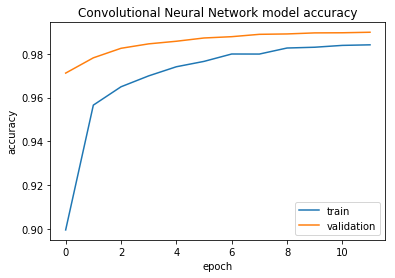

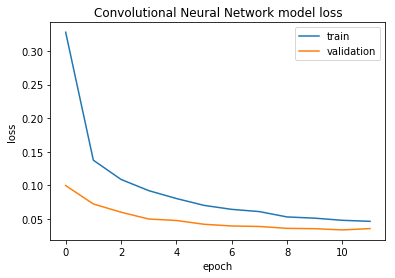

In [74]:
plt.plot(history_optim_cnn_gridsearch.history['acc'])
plt.plot(history_optim_cnn_gridsearch.history['val_acc'])
plt.title('Convolutional Neural Network model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(history_optim_cnn_gridsearch.history['loss'])
plt.plot(history_optim_cnn_gridsearch.history['val_loss'])
plt.title('Convolutional Neural Network model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Confusion Matrix

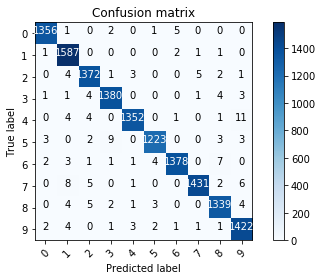

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1365
           1       0.98      1.00      0.99      1592
           2       0.98      0.99      0.99      1388
           3       0.99      0.99      0.99      1394
           4       0.99      0.98      0.99      1373
           5       0.99      0.98      0.99      1243
           6       0.99      0.99      0.99      1397
           7       0.99      0.98      0.99      1453
           8       0.98      0.99      0.99      1358
           9       0.98      0.99      0.99      1437

   micro avg       0.99      0.99      0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [59]:
# Note: Have to use 'original' labels, i.e. no 'to_categorical'
y_pred_optim_cnn_gridsearch = model_optim_cnn_gridsearch.predict_classes(X_test_cnn)
conf_mat_optim_cnn = confusion_matrix(y_test_cnn, y_pred_optim_cnn_gridsearch)

plots_util.plot_confusion_matrix(conf_mat_optim_cnn)
target_names = ['0','1', '2','3','4','5','6','7','8','9']  
print(classification_report(y_test_cnn, y_pred_optim_cnn_gridsearch, target_names=target_names))

In [75]:
scores_cnn_optim = model_optim_cnn_gridsearch.evaluate(X_test_cnn, y_test_cnn_cat)

14000/14000 [==============================] - 3s 192us/step


In [77]:
print(scores_cnn_optim[1])

0.9885714285714285
